#### Yūgen

# Trip Duration EDA

**By Omar Yasser**


## Data Inspection 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from geopy import distance
from geopy.point import Point
import math

#No Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the data
df_train = pd.read_csv('split/train.csv')
df_val = pd.read_csv('split/val.csv')

df = pd.concat([df_train, df_val])

df.reset_index(drop=True, inplace=True)

In [4]:
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967
...,...,...,...,...,...,...,...,...,...,...
1229314,id3691639,1,2016-01-22 22:56:07,1,-73.988518,40.737137,-73.983948,40.765041,N,970
1229315,id1528272,2,2016-02-23 22:09:12,2,-74.006371,40.733372,-73.975792,40.782909,N,939
1229316,id3562069,1,2016-02-20 16:01:23,1,-74.013237,40.716980,-74.001297,40.734604,N,486
1229317,id0402200,2,2016-03-29 19:35:28,1,-73.978394,40.748280,-73.982002,40.736580,N,269


In [5]:
df.shape

(1229319, 10)

### Columns Overview

In [6]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

- id - a unique identifier for each trip

- vendor_id - a code indicating the provider associated with the trip record

- pickup_datetime: date and time when the meter was engaged (Start of the trip)

- dropoff_datetime: date and time when the meter was disengaged (end of the trip)

- passenger_count: the number of passengers in the vehicle (driver entered value)

- pickup_longitude: the longitude where the meter was engaged

- pickup_latitude: the latitude where the meter was engaged

- dropoff_longitude: the longitude where the meter was disengaged

- dropoff_latitude: the latitude where the meter was disengaged

- store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

- trip_duration: duration of the trip in seconds

- **Note** trip_duration is the target

## Some Statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1229319.0,1.534912,0.498780,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1229319.0,1.664531,1.314509,0.000000,1.000000,1.000000,2.000000,8.000000e+00
pickup_longitude,1229319.0,-73.973446,0.061780,-121.933342,-73.991852,-73.981728,-73.967346,-6.133553e+01
pickup_latitude,1229319.0,40.750928,0.033545,34.359695,40.737370,40.754108,40.768360,5.188108e+01
dropoff_longitude,1229319.0,-73.973395,0.061641,-121.933304,-73.991325,-73.979759,-73.963028,-6.133553e+01
dropoff_latitude,1229319.0,40.751816,0.036341,32.181141,40.735901,40.754532,40.769821,4.392103e+01
trip_duration,1229319.0,959.691748,5263.573404,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


- We can see that we have 2 unique **vendor_id** so we have 2 service provider
- From **passenger_count** we can see that the min is **0** and the max is **8**, 
How we can have **0 passenger** !!! and maybe **8 passenger** is ALOT to be handled
- The min trip duration is **1 sec** and **this is quite upnormal**
the max trip duration is **3.526282e+06 sec** or 58771 minute that mean the trip take 40 days to be completed
 

In [8]:
# check for nan and duplicated
dublict = df.duplicated().sum()

print(f"number of nan vlaues = {df.isna().sum().sum()}")

print(f"number of dublicated vlaues = {dublict}")


number of nan vlaues = 0
number of dublicated vlaues = 0


In [9]:
print(df['store_and_fwd_flag'].describe(), end='\n\n')

print(df['store_and_fwd_flag'].value_counts(), end='\n\n')

count     1229319
unique          2
top             N
freq      1222501
Name: store_and_fwd_flag, dtype: object

store_and_fwd_flag
N    1222501
Y       6818
Name: count, dtype: int64



In [10]:
#drop id column
df.drop('id', inplace=True, axis=1)

## Feature Analysis

In [11]:
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


### Trip duration (Target Variable)

In [12]:
#convert the seconds to minutes to make it easy to read
trip_duration_seconds = df['trip_duration'].copy()

trip_duration_min = trip_duration_seconds / 60

trip_duration_min = pd.DataFrame(trip_duration_min.round().astype(int))

print('std   ', trip_duration_min.std())
print('min   ', trip_duration_min.min())
print('mean  ', trip_duration_min.mean())
print('median', trip_duration_min.median())
print('max   ', trip_duration_min.max())




std    trip_duration    87.727007
dtype: float64
min    trip_duration    0
dtype: int32
mean   trip_duration    15.994689
dtype: float64
median trip_duration    11.0
dtype: float64
max    trip_duration    58771
dtype: int32


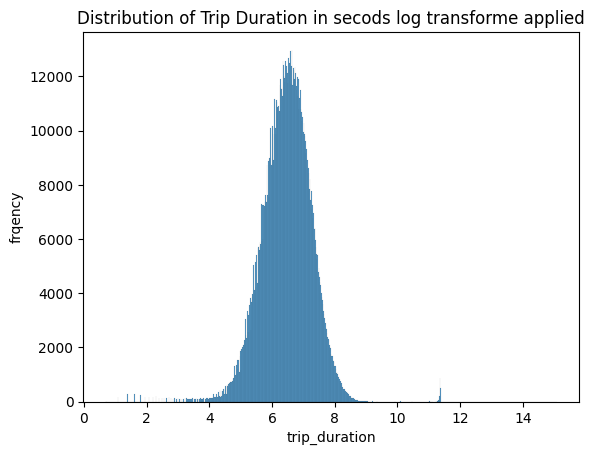

In [13]:
#we will perform log transform on trip_duration
df['trip_duration_log_transform'] = np.log1p(df['trip_duration'].values)

sns.histplot(df['trip_duration_log_transform'], label='trip_duration')
plt.title("Distribution of Trip Duration in secods log transforme applied")
plt.xlabel('trip_duration')
plt.ylabel("frqency")
plt.show()

- You can see there is some outliers
- most of them are in between [4 to 8] **NOTE: we scaled the data using np.log()**

### vendor_id

- we want to see what is different between the two service provider

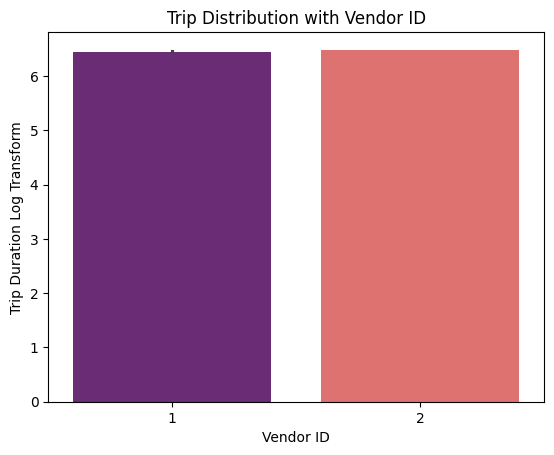

In [14]:
sns.barplot(data=df, x='vendor_id', y='trip_duration_log_transform', palette='magma')
plt.title("Trip Distribution with Vendor ID")
plt.xlabel("Vendor ID")
plt.ylabel("Trip Duration Log Transform")
plt.show()

- its look like the is no different between the 2 service provider
- we can check for some noise (by apply boxplot)

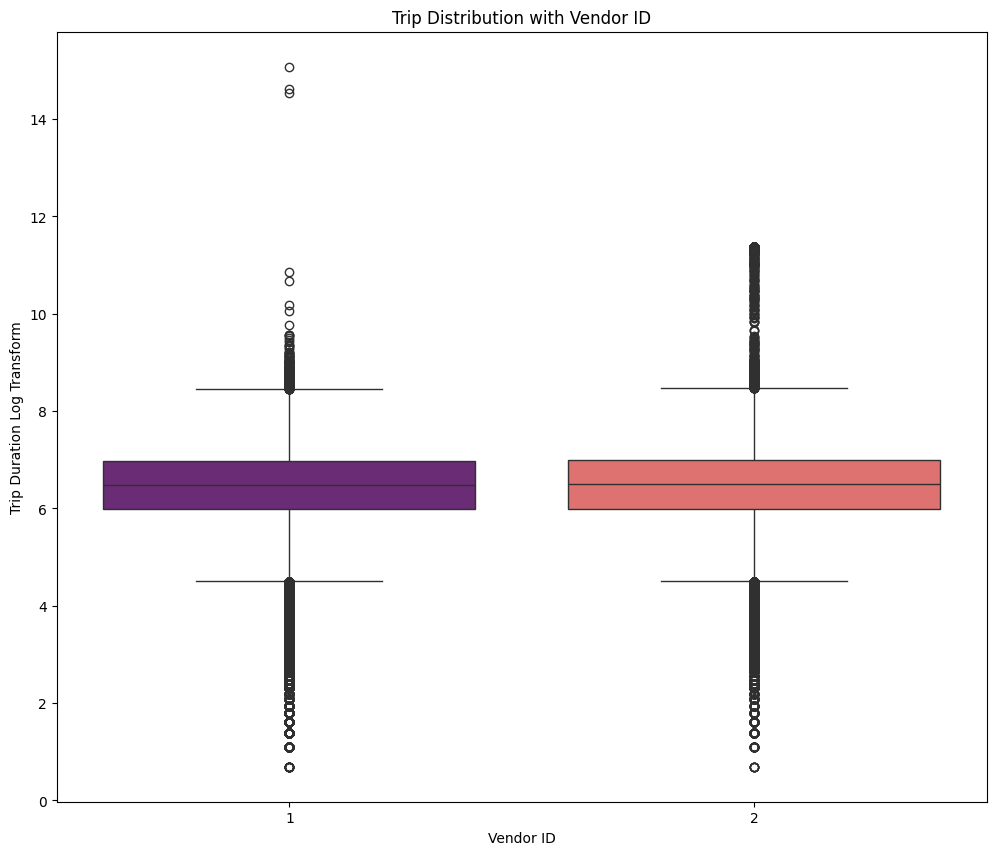

In [15]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='vendor_id', y='trip_duration_log_transform', palette='magma')
plt.title("Trip Distribution with Vendor ID")
plt.xlabel("Vendor ID")
plt.ylabel("Trip Duration Log Transform")
plt.show()

- we can see there is some outlire for both Vendor

### passenger_count

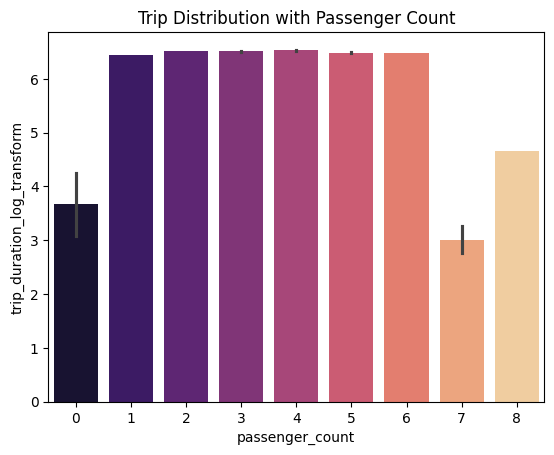

In [16]:
sns.barplot(data=df, x='passenger_count', y='trip_duration_log_transform', palette='magma')
plt.title("Trip Distribution with Passenger Count")
plt.show()

- When the number of passenger groups from [1 to 6] take constant trip duration and the number of passenger groups from [7 to 8] take less trip duration.

- And for the **0 Passenger** maybe the driver enter the number wrong or error in the system 

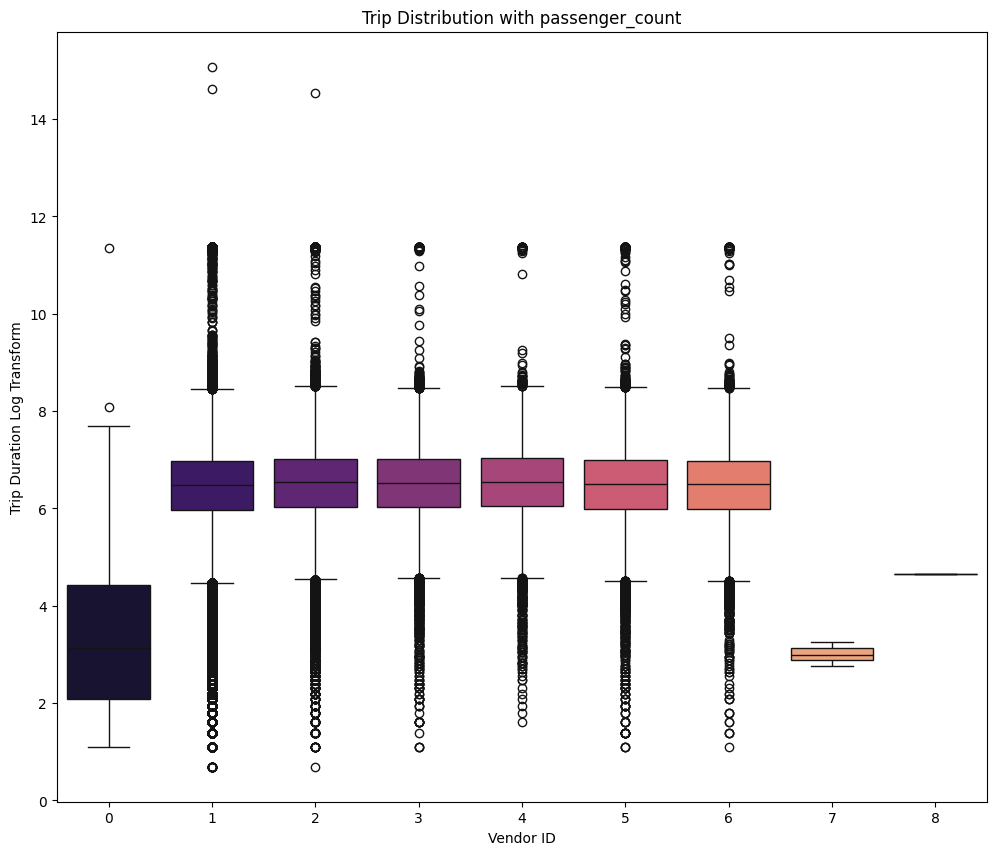

In [17]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='passenger_count', y='trip_duration_log_transform', palette='magma')
plt.title("Trip Distribution with passenger_count")
plt.xlabel("Vendor ID")
plt.ylabel("Trip Duration Log Transform")
plt.show()

### Geography Data
**longitude	and latitude for drop-off and pick-up**

In [18]:
Geo_df = pd.DataFrame()
def get_distance_km(df):
    pickup_coords = (df['pickup_latitude'], df['pickup_longitude'])
    dropoff_coords = (df['dropoff_latitude'], df['dropoff_longitude'])
    distance_km = distance.geodesic(pickup_coords, dropoff_coords).km
    return distance_km

Geo_df['distance'] = df.apply(get_distance_km, axis=1)
    

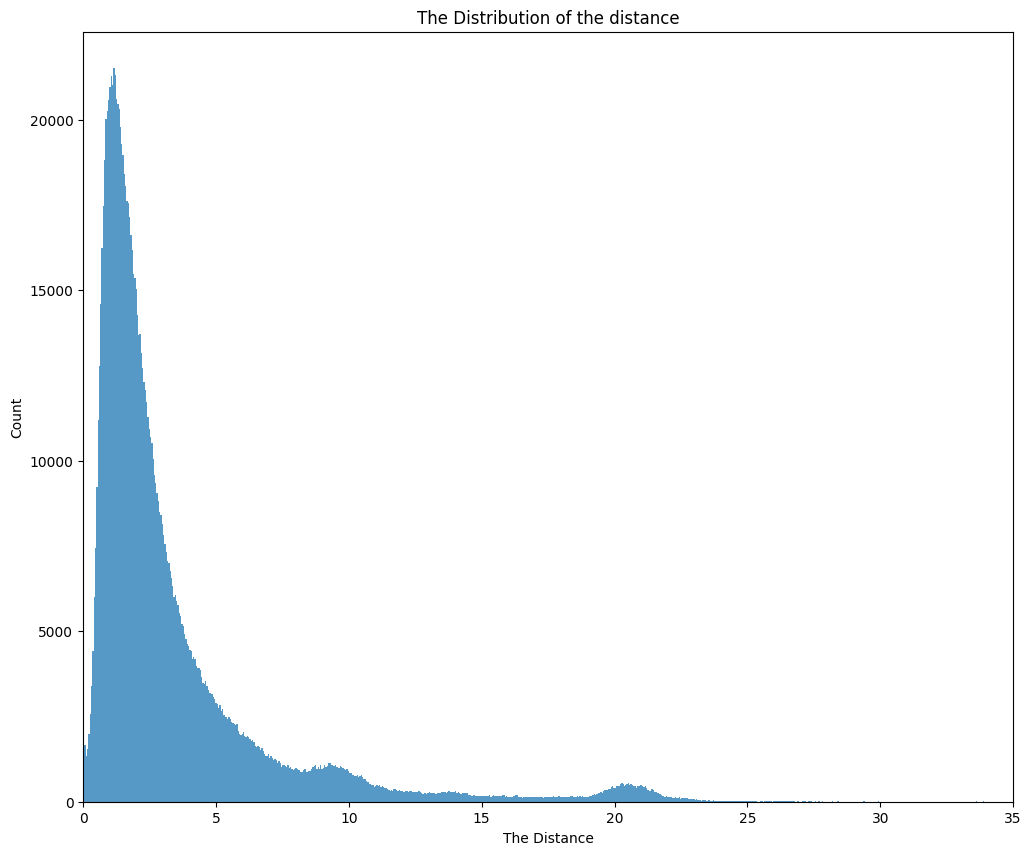

In [19]:

plt.figure(figsize=(12,10))
sns.histplot(data=Geo_df, x='distance',palette='magma')
plt.title("The Distribution of the distance")
plt.xlabel("The Distance")
plt.ylabel("Count")
plt.xlim(0, 35)
plt.show()

- look like most of the trip's distance are from [1 to 25]km but most of them are in the range between [1 to 5]km

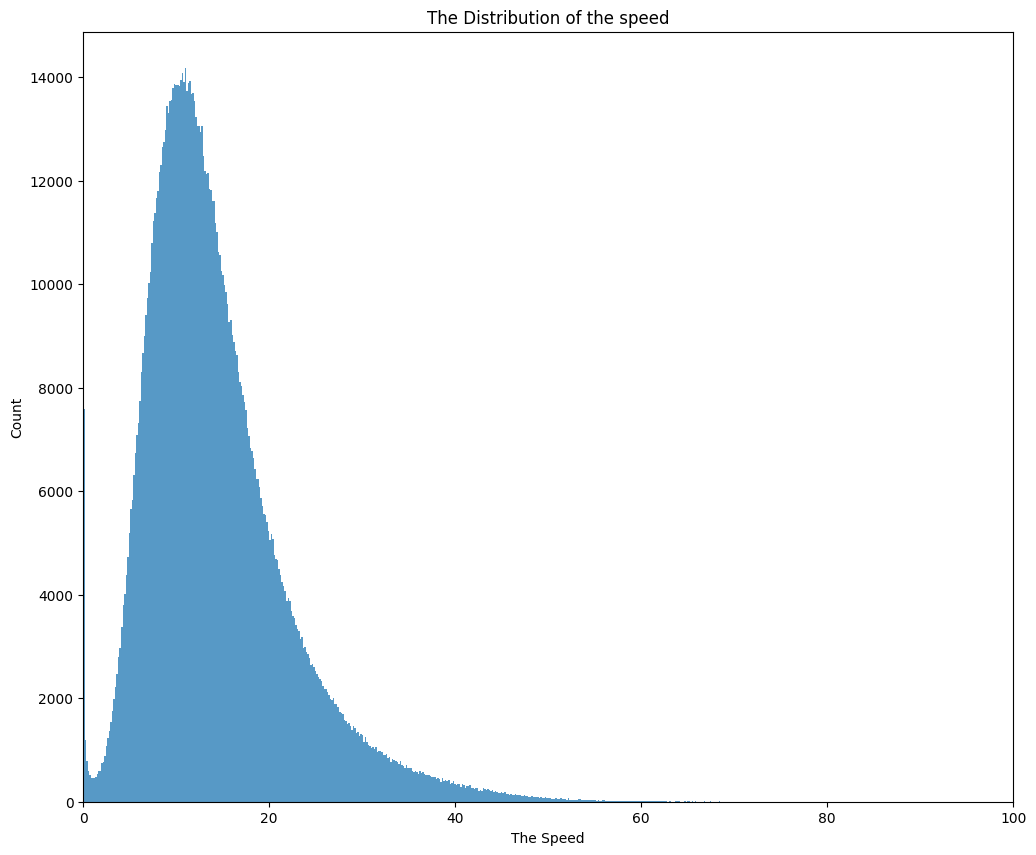

In [20]:
#get the speed of the trip

Geo_df['speed_km/h'] = Geo_df['distance'] / (df['trip_duration'] /(60*60)) #km/h

plt.figure(figsize=(12,10))
sns.histplot(data=Geo_df, x='speed_km/h',palette='magma')
plt.title("The Distribution of the speed")
plt.xlabel("The Speed")
plt.ylabel("Count")
plt.xlim(0, 100)
plt.show()

- we can see that most of the trip speed between [1 to 40]km/h

### Time Data Analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229319 entries, 0 to 1229318
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   vendor_id                    1229319 non-null  int64  
 1   pickup_datetime              1229319 non-null  object 
 2   passenger_count              1229319 non-null  int64  
 3   pickup_longitude             1229319 non-null  float64
 4   pickup_latitude              1229319 non-null  float64
 5   dropoff_longitude            1229319 non-null  float64
 6   dropoff_latitude             1229319 non-null  float64
 7   store_and_fwd_flag           1229319 non-null  object 
 8   trip_duration                1229319 non-null  int64  
 9   trip_duration_log_transform  1229319 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 93.8+ MB


- we need to switch the type of **pickup_datetime** and **dropoff_datetime**
- And we can extract more feature from **pickup_datetime** like the hour, the day of the week, month, and the season 

In [22]:
#convert them to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']) 
#df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
 

In [23]:
#extrating the new feature => hour, day of the week, month, and season
df_time = pd.DataFrame()
df_time['pick_hour'] = df['pickup_datetime'].dt.hour
df_time['pick_day_of_week'] = df['pickup_datetime'].dt.day_of_week
df_time['pick_month'] = df['pickup_datetime'].dt.month

def month_to_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'unknown'
def time_period(hour):
    if 5 <= hour < 12:  # from 5am to 11:59 am
        return 'Morning'
    elif 12 <= hour < 17:  # from 12:00pm to 4:59pm
        return 'Afternoon'
    else:                   # from 5:00pm to 4:59am 
        return 'Night' 

df_time['pick_season'] = df_time['pick_month'].apply(month_to_season)

df_time['pick_time_period'] = df_time['pick_hour'].apply(time_period)

df_time.head()

,pick_hour,pick_day_of_week,pick_month,pick_season,pick_time_period
0,7,2,6,Summer,Morning
1,12,6,4,Spring,Afternoon
2,2,6,6,Summer,Night
3,17,3,5,Spring,Night
4,17,3,5,Spring,Night


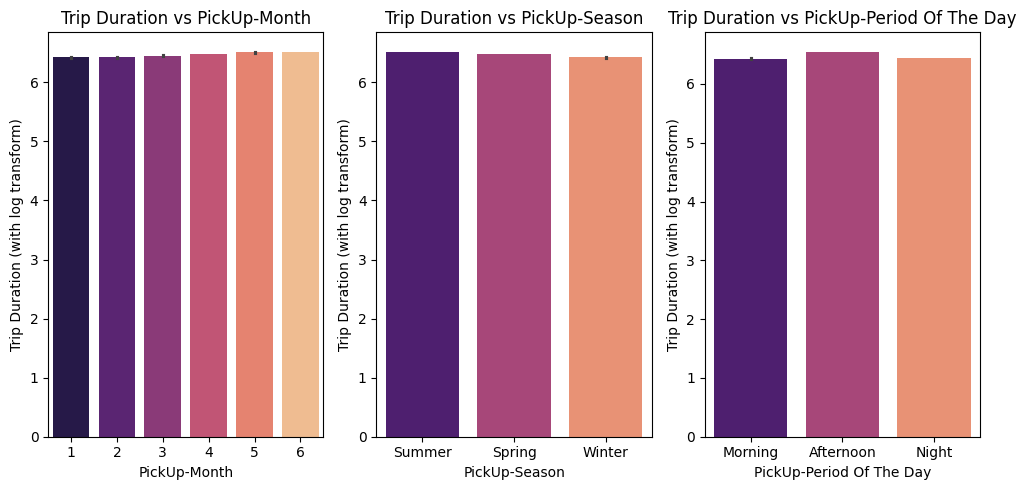

In [24]:
#Create supplots to cheack the relationship between trip duration and pickup month, pickup season and pickup pickup time period

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

#first subplot for pickup month
sns.barplot(data=df, x=df_time['pick_month'], y='trip_duration_log_transform', palette='magma', ax=ax1)
ax1.set_title('Trip Duration vs PickUp-Month')
ax1.set_xlabel('PickUp-Month')
ax1.set_ylabel('Trip Duration (with log transform)')

#second subplot for pickup season
sns.barplot(data=df, x=df_time['pick_season'], y='trip_duration_log_transform', palette='magma', ax=ax2)
ax2.set_title('Trip Duration vs PickUp-Season')
ax2.set_xlabel('PickUp-Season')
ax2.set_ylabel('Trip Duration (with log transform)')

#third subplot for pickup time period of the day
sns.barplot(data=df, x=df_time['pick_time_period'], y='trip_duration_log_transform', palette='magma', ax=ax3)
ax3.set_title('Trip Duration vs PickUp-Period Of The Day')
ax3.set_xlabel('PickUp-Period Of The Day')
ax3.set_ylabel('Trip Duration (with log transform)')

plt.tight_layout()
plt.show()

- We can see that in [4,5,6] months there alittle increase maybe its becouse 4 and 5 are Spring season and for 6 maybe becouse the start of the Summer vacation
- The Summer season is the highest between other seasons maybe becouse the start of the Summer vacation
- In the day Afternoon is the highest becouse its the middle of the day   

## Correlation Analysis

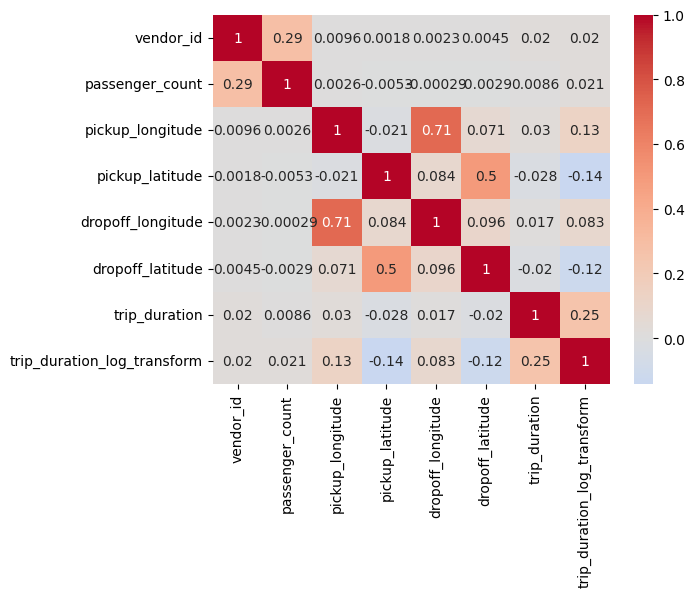

In [29]:
correlation_matrix = df.drop(["pickup_datetime", "store_and_fwd_flag"], axis=1, inplace=False).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

- we have four posstive relation trip duration (with log) DropOff longitude, PickUp longitude, passenger count and vendor id
- we have two negative relation trip duration (with log)  DropOff latitude, PickUp latitude

In [26]:
def calculate_direction(row):
    pickup_coordinates =  Point(row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coordinates = Point(row['dropoff_latitude'], row['dropoff_longitude'])
    
    # Calculate the difference in longitudes
    delta_longitude = dropoff_coordinates[1] - pickup_coordinates[1]
    
    # Calculate the bearing (direction) using trigonometry
    y = math.sin(math.radians(delta_longitude)) * math.cos(math.radians(dropoff_coordinates[0]))
    x = math.cos(math.radians(pickup_coordinates[0])) * math.sin(math.radians(dropoff_coordinates[0])) - \
        math.sin(math.radians(pickup_coordinates[0])) * math.cos(math.radians(dropoff_coordinates[0])) * \
        math.cos(math.radians(delta_longitude))
    
    # Calculate the bearing in degrees
    bearing = math.atan2(y, x)
    bearing = math.degrees(bearing)
    
    # Adjust the bearing to be in the range [0, 360)
    bearing = (bearing + 360) % 360
    
    return bearing

Geo_df['dirction'] = df.apply(calculate_direction, axis=1)

- Above code we calculate the direction that the taxi driver take it may help in the model, We will see it correlation with the trip duration (the target value)

In [27]:
def manhattan_distance(df):
   lat_distance = abs(df['pickup_latitude'] - df['dropoff_latitude']) * 111  
   lon_distance = abs(df['pickup_longitude'] - df['dropoff_longitude']) * 111 * math.cos(math.radians(df['pickup_latitude']))
   
   return lat_distance + lon_distance
   

Geo_df['manh'] = df.apply(manhattan_distance, axis=1)

- After investgate the Longtitude and the latitude of the data we figured out the data is all about Manhattan city in New York
- the above code try to get the real distance between the PickUp and the DropOff
- Therefore we can easily compute that 1 degree of latitude and longitude is equal to 111km reference=>https://www.google.com.eg/search?q=approx+km+per+degree+latitude+and+longitude&sca_esv=987a2e6060705a91&sxsrf=ADLYWIIacw9kCsl7JVcLlwlQcl8Vh3YhTg%3A1729253688599&ei=OFESZ62ZJOaRkdUP7Ji-uQU&oq=approx+km+per+degree+latitude+and+&gs_lp=Egxnd3Mtd2l6LXNlcnAiImFwcHJveCBrbSBwZXIgZGVncmVlIGxhdGl0dWRlIGFuZCAqAggAMgUQIRigAUjLaFCUEVjAYnAHeAGQAQCYAakBoAGcCKoBAzAuOLgBA8gBAPgBAZgCD6ACtQjCAgoQABiwAxjWBBhHwgIHECMYsAIYJ8ICCBAAGIAEGKIEwgIEECMYJ8ICBxAhGKABGAqYAwCIBgGQBgSSBwM3LjigB9EV&sclient=gws-wiz-serp

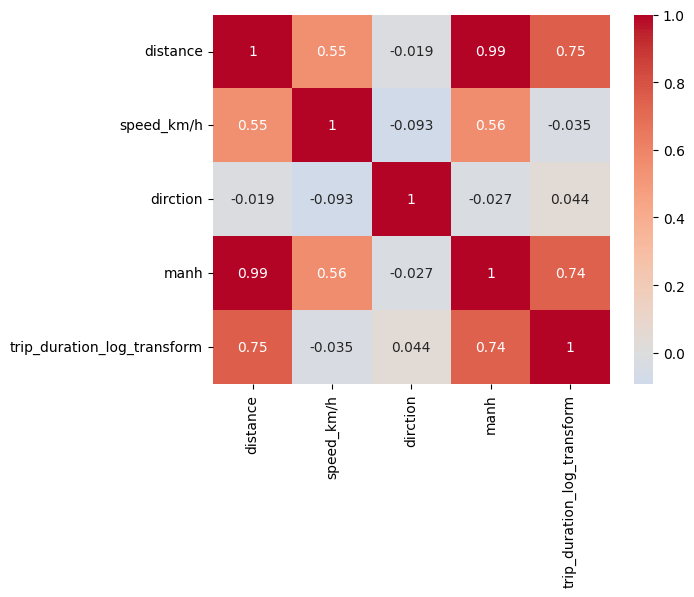

In [28]:
Geo_df['trip_duration_log_transform'] = df['trip_duration_log_transform']
Geo_df['distance'] = np.log1p(Geo_df['distance'])
Geo_df['manh'] = np.log1p(Geo_df['manh'])
Geo_df['speed_km/h'] = np.log1p(Geo_df['speed_km/h'])

geo_corr = Geo_df.corr()
sns.heatmap(geo_corr, annot=True, cmap='coolwarm', center=0)
plt.show()

- There strong posstive relation trip duration (with log) with distance and Manh.

- There negative relation trip duration (with log) with speed kmh.